# Supplier Segmentation 

### Krajic Matrix

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import inventorize3 as inv

In [2]:
df = pd.read_csv("supplier_data.csv")
df.head()

,supplier,product,availability,no_suppliers,standard,price_fluctuation,Quantity,price
0,supplier1,product_1,0.0,0.5,0.0,0.5,710,360
1,supplier1,product_2,0.0,0.5,0.0,0.5,2997,2740
2,supplier1,product_3,0.0,0.5,0.0,0.5,3917,2919
3,supplier1,product_4,0.0,0.5,0.0,0.5,3827,3246
4,supplier1,product_5,0.0,0.5,0.0,0.0,3882,3596


In [3]:
df["availability"].unique()

array([0. , 0.5])

In [4]:
df.columns

Index(['supplier', 'product', 'availability', 'no_suppliers', 'standard',
       'price_fluctuation', 'Quantity', 'price'],
      dtype='object')

In [6]:
df['risk_index']= df['availability']+df['no_suppliers']+df['standard']+df['price_fluctuation']
df.head()

,supplier,product,availability,no_suppliers,standard,price_fluctuation,Quantity,price,risk_index
0,supplier1,product_1,0.0,0.5,0.0,0.5,710,360,1.0
1,supplier1,product_2,0.0,0.5,0.0,0.5,2997,2740,1.0
2,supplier1,product_3,0.0,0.5,0.0,0.5,3917,2919,1.0
3,supplier1,product_4,0.0,0.5,0.0,0.5,3827,3246,1.0
4,supplier1,product_5,0.0,0.5,0.0,0.0,3882,3596,0.5


In [7]:
df['value']= df['price']*df ['Quantity']
df.head()

,supplier,product,availability,no_suppliers,standard,price_fluctuation,Quantity,price,risk_index,value
0,supplier1,product_1,0.0,0.5,0.0,0.5,710,360,1.0,255600
1,supplier1,product_2,0.0,0.5,0.0,0.5,2997,2740,1.0,8211780
2,supplier1,product_3,0.0,0.5,0.0,0.5,3917,2919,1.0,11433723
3,supplier1,product_4,0.0,0.5,0.0,0.5,3827,3246,1.0,12422442
4,supplier1,product_5,0.0,0.5,0.0,0.0,3882,3596,0.5,13959672


In [8]:
df["value"].describe()

count    2.400000e+01
mean     5.064812e+06
std      4.847504e+06
min      1.189500e+05
25%      7.975622e+05
50%      3.011452e+06
75%      8.499426e+06
max      1.399081e+07
Name: value, dtype: float64

In [9]:
#### lets create condition based on 50% i.e 3000000

def category(x,y):
    if((x>= 3000000)& (y >= 1)):
        return 'strategic'
    if((x>= 3000000)& (y < 1)):
        return 'leverage'
    if((x < 3000000)& (y >= 1)):
        return 'Critical'
    if((x < 3000000)& (y < 1)):
        return 'Routine'

In [11]:
### looping the first column with the above function

for i in range(df.shape[0]):
    df.loc[i,'category']=category(df.loc[i,'value'],
                                        df.loc[i,'risk_index'])

In [12]:
df.category.value_counts()

Critical     10
strategic     8
leverage      4
Routine       2
Name: category, dtype: int64

<Axes: xlabel='value', ylabel='risk_index'>

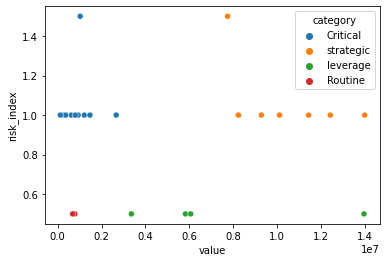

In [14]:
sns.scatterplot(x='value',y='risk_index',data=df, hue='category')